In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/Madedata1.csv')

In [6]:
df.shape

(2499, 12)

In [7]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [8]:
pd.value_counts(df['Gender'])

Male           1257
Female         1208
Transgender      34
Name: Gender, dtype: int64

In [9]:
pd.value_counts(df['Severity'])

Mild        1591
Moderate     525
Severe       383
Name: Severity, dtype: int64

In [10]:
pd.value_counts(df['Contact_with_covid_patient'])

No           1203
Yes           638
Not known     633
yes            25
Name: Contact_with_covid_patient, dtype: int64

In [11]:
df['Contact_with_covid_patient']= df['Contact_with_covid_patient'].str.lower()

In [12]:
pd.value_counts(df['Contact_with_covid_patient'])

no           1203
yes           663
not known     633
Name: Contact_with_covid_patient, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [14]:
gender_label = LabelEncoder()
df['Gender']= gender_label.fit_transform(df['Gender'])

In [15]:
pd.value_counts(df['Gender'])

1    1257
0    1208
2      34
Name: Gender, dtype: int64

In [16]:
severity_label = LabelEncoder()
df['Severity']= severity_label.fit_transform(df['Severity'])

In [17]:
contact_label = LabelEncoder()
df['Contact_with_covid_patient']= contact_label.fit_transform(df['Contact_with_covid_patient'])

In [18]:
gender = df['Gender'].values
severity = df['Severity'].values
contact = df['Contact_with_covid_patient'].values

In [19]:
gender

array([1, 1, 2, ..., 0, 0, 0])

In [20]:
severity

array([0, 1, 2, ..., 0, 0, 2])

In [21]:
contact

array([0, 1, 0, ..., 2, 1, 2])

In [22]:
gender_onehot = OneHotEncoder()
gender = gender_onehot.fit_transform(gender.reshape(-1,1))

In [23]:
gender

<2499x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2499 stored elements in Compressed Sparse Row format>

In [24]:
gender = gender.toarray()

In [25]:
gender

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
severity_onehot = OneHotEncoder()
severity = severity_onehot.fit_transform(severity.reshape(-1,1)).toarray()

contact_onehot = OneHotEncoder()
contact = contact_onehot.fit_transform(contact.reshape(-1,1)).toarray()

In [27]:
severity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [28]:
contact

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
df.drop(columns=['Country', 'Gender', 'Severity', 'Contact_with_covid_patient'], inplace=True)

In [30]:
df.head()

,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,10,102,1,0,0,0,1,0
1,20,103,1,1,0,0,0,1
2,55,99,0,0,0,1,1,0
3,37,100,0,1,1,0,0,1
4,45,101,1,1,1,1,0,1


In [31]:
X = df.iloc[:,:-1].values

In [32]:
y = df.iloc[:,-1].values

In [33]:
import numpy as np


In [34]:
X = np.c_[X, gender, severity, contact]

In [35]:
X[0]

array([ 10., 102.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.])

In [36]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [37]:
X[0]

array([0.        , 0.66666667, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
x_train.shape

(1874, 16)

In [41]:
x_test.shape

(625, 16)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
accuracy_score(y_test,y_pred)

0.9392

In [47]:
confusion_matrix(y_test,y_pred)

array([[283,  27],
       [ 11, 304]])

In [48]:
y_pred.shape

(625,)

In [49]:
y_test.shape

(625,)

In [50]:
#correct predictions
284+300

584

In [51]:
#wrong predictions
21+20

41

In [52]:
284/(284+21)

0.9311475409836065

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from sklearn.metrics import roc_curve

In [55]:
pred_prob = model.predict_proba(x_test)

In [62]:
#pred_prob[:,1]

In [64]:
fpr,tpr, thresh= roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [76]:
#thresh
random_prob = [0 for i in range(len(y_test))]
p_fpr,p_tpr ,_= roc_curve(y_test, random_prob, pos_label=1)

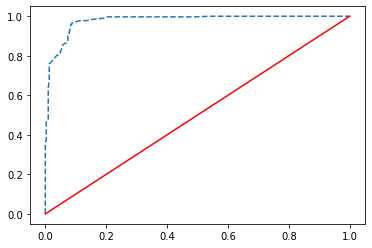

In [77]:
plt.plot(fpr, tpr, linestyle='--')
plt.plot(p_fpr, p_tpr, color='red')
plt.show()

In [79]:
import pickle as pkl

In [80]:
file = open('model.pkl', 'wb')
pkl.dump(model,file)
file.close

<function BufferedWriter.close>

In [82]:
file.close()

In [83]:
file = open('gender_label.pkl', 'wb')
pkl.dump(gender_label,file)
file.close()

file = open('gender_onehot.pkl', 'wb')
pkl.dump(gender_onehot,file)
file.close()

file = open('severity_label.pkl', 'wb')
pkl.dump(severity_label,file)
file.close()

file = open('severity_onehot.pkl', 'wb')
pkl.dump(severity_onehot,file)
file.close()

file = open('contact_label.pkl', 'wb')
pkl.dump(contact_label,file)
file.close()

file = open('contact_onehot.pkl', 'wb')
pkl.dump(contact_onehot,file)
file.close()